In [362]:
# Importing tools for EDA.  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# Importing input data
df = pd.read_csv('~/Documents/Git/skillfactory/Unit2/datasheet/prj2_eda_stud_math.csv')

display(data.head(3))
df.info()

# First conclusion: We are going to predict the influence of different factors (columns)
# on score (column).  
# That is why I`ll drop all NaN values at score colum first.  
df.dropna(subset = ["score"], inplace=True)

# Let`s see the columns names.  
df.columns

# Let`s rename some columns to a common pattern.  
df.columns = ['school', 'sex', 'age', 'addr', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paidlessons', 'activities', 'nursery',
       'granular', 'wishhigher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

#Let`s see the results of renaming.  
display(df.head(40))

,school,sex,age,addr,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paidlessons,activities,nursery,wishhigher,internet,romantic,famrel,freetime,goout,health,absences,score,col
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,None
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,None
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,addr,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paidlessons,activities,nursery,granular,wishhigher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [363]:
# Let`s see how does a score data looks like.  
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

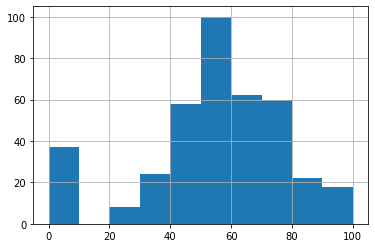

In [364]:
df.score.hist()

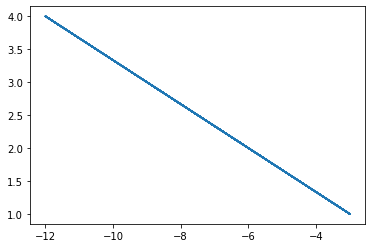

In [365]:
# Let`s see what data is in granular column - I have 
# no description for it`s data.  

plt.plot(df.granular, df.studytime)

In [366]:
# The granular and studytime are totally identical.  
# I will drop granular column from the dataset.  
df.drop(['granular'], inplace=True, axis=1)

In [367]:
# Let`s prepare all other data for processing.  
# Looking for missing, None and NaN data in columns.  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       389 non-null    object 
 1   sex          389 non-null    object 
 2   age          389 non-null    int64  
 3   addr         374 non-null    object 
 4   famsize      362 non-null    object 
 5   pstatus      344 non-null    object 
 6   medu         386 non-null    float64
 7   fedu         365 non-null    float64
 8   mjob         370 non-null    object 
 9   fjob         353 non-null    object 
 10  reason       372 non-null    object 
 11  guardian     358 non-null    object 
 12  traveltime   361 non-null    float64
 13  studytime    382 non-null    float64
 14  failures     367 non-null    float64
 15  schoolsup    380 non-null    object 
 16  famsup       351 non-null    object 
 17  paidlessons  350 non-null    object 
 18  activities   375 non-null    object 
 19  nursery 

In [429]:
def get_iqr_data(col, set_range_min=0, set_range_max=1000, set_bins=16):
    # Calculating quantiles and IQR.  
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    iqr = perc75-perc25
    
    # Preparing output.  
    print('25th percentile:{},'.format(perc25),
         '75th pecentile:{}'.format(perc75),
         'IQR:{}'.format(iqr),
         "Outlier margins: [{a},{b}]".format(a=perc25-1.5*iqr,
                                             b=perc75+1.5*iqr))
   
    # Preparing graphics.  
    df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)].hist(bins=set_bins, 
                                                          range=(set_range_min,set_range_max),
                                                          label='IQR')
    df[col].hist(alpha=0.3, bins=set_bins, range=(set_range_min,set_range_max), label='All Data')
    plt.legend()
    plt.grid()
    plt.show()
    
    #Outliers to remove:
    outliers_count = (df[col].value_counts()
                     -df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)].value_counts())
    print("---")
    print("Outliers removed:{}".format(outliers_count))
    df[col] = df[col].loc[df[col].between(perc25-1.5*iqr,perc75+1.5*iqr)]
    return

def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+col)
    plt.show()
    return

def check_column(col):
    print("\n\n---",col,"(",df[col].dtype,")---")
    display(df[col].describe())
    
    if df[col].dtype == 'object':
        # Cleaning nan values.  
        df[col] = df[col].astype(str).apply(lambda x:None if x=='nan' else x)
        # Cleaning NaN values.  
        df[col] = df[col].astype(str).apply(lambda x:None if x.strip()=='' else x)
        # Only valid data left.  
        df[col] = df[col].loc[df[col]!='None']
        # Building hist
        print(df[col].hist())
        # Building boxplot
        print(get_boxplot(col))
        
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df.dropna(subset=[col], inplace=True)
        print(get_iqr_data(col, df[col].min(), df[col].max()))
        
    else:
        print("UNKNOWN DATATYPE FOR COL",col)
    
    print("Null values:",df[col].isnull().values.sum())
    print("Unique values:",df[col].nunique())
    print("Total values in column: ",df[col].value_counts().sum())
    print("Valid values:")
    print(df[col].value_counts())
    return




--- school ( object )---


count     145
unique      2
top        GP
freq      126
Name: school, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


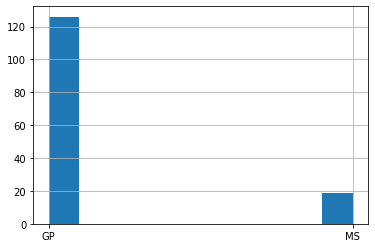

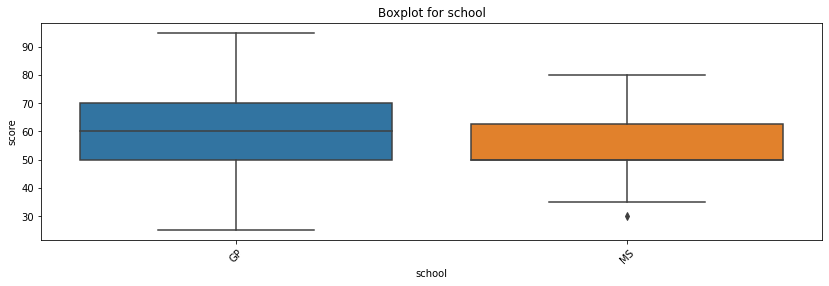

None
Null values: 0
Unique values: 2
Total values in column:  145
Valid values:
GP    126
MS     19
Name: school, dtype: int64


--- sex ( object )---


count     145
unique      2
top         F
freq       74
Name: sex, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


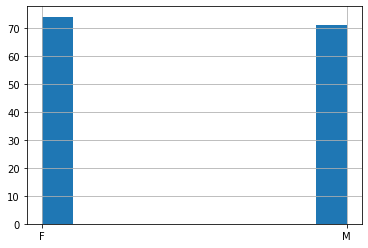

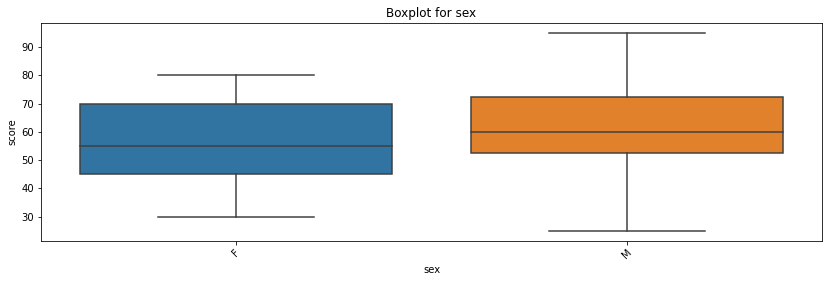

None
Null values: 0
Unique values: 2
Total values in column:  145
Valid values:
F    74
M    71
Name: sex, dtype: int64


--- age ( float64 )---


count    145.000000
mean      16.475862
std        1.034695
min       15.000000
25%       16.000000
50%       16.000000
75%       17.000000
max       18.000000
Name: age, dtype: float64

25th percentile:16.0, 75th pecentile:17.0 IQR:1.0 Outlier margins: [14.5,18.5]


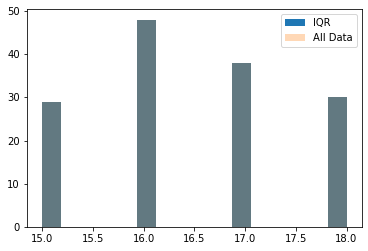

---
Outliers removed:16.0    0
17.0    0
18.0    0
15.0    0
Name: age, dtype: int64
None
Null values: 0
Unique values: 4
Total values in column:  145
Valid values:
16.0    48
17.0    38
18.0    30
15.0    29
Name: age, dtype: int64


--- addr ( object )---


count     141
unique      2
top         U
freq      116
Name: addr, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


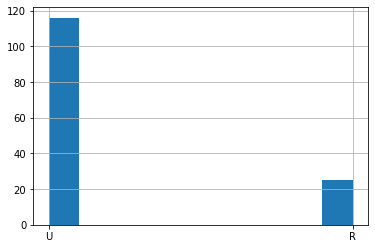

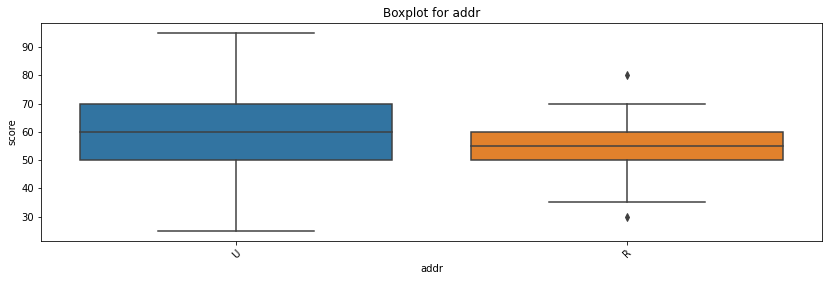

None
Null values: 4
Unique values: 2
Total values in column:  141
Valid values:
U    116
R     25
Name: addr, dtype: int64


--- famsize ( object )---


count     139
unique      2
top       GT3
freq       95
Name: famsize, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


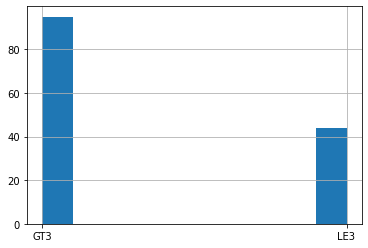

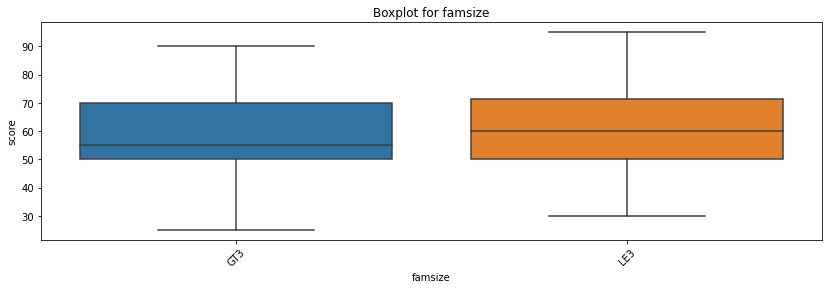

None
Null values: 6
Unique values: 2
Total values in column:  139
Valid values:
GT3    95
LE3    44
Name: famsize, dtype: int64


--- pstatus ( object )---


count     132
unique      2
top         T
freq      121
Name: pstatus, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


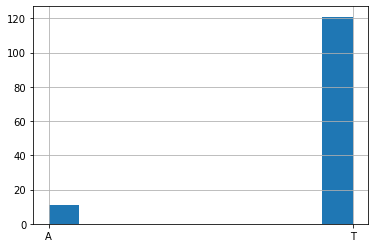

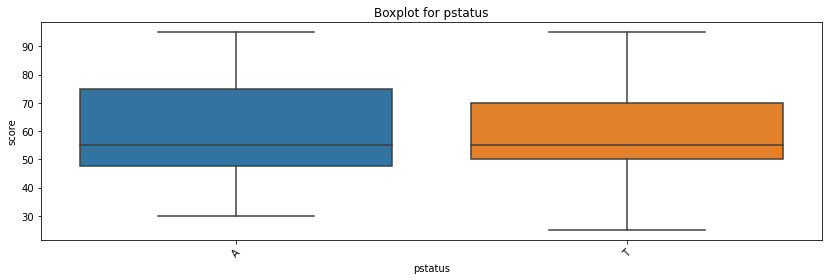

None
Null values: 13
Unique values: 2
Total values in column:  132
Valid values:
T    121
A     11
Name: pstatus, dtype: int64


--- medu ( float64 )---


count    145.000000
mean       2.903448
std        1.107576
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

25th percentile:2.0, 75th pecentile:4.0 IQR:2.0 Outlier margins: [-1.0,7.0]


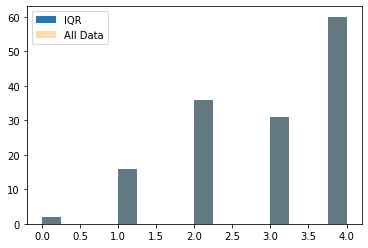

---
Outliers removed:4.0    0
2.0    0
3.0    0
1.0    0
0.0    0
Name: medu, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  145
Valid values:
4.0    60
2.0    36
3.0    31
1.0    16
0.0     2
Name: medu, dtype: int64


--- fedu ( float64 )---


count    145.000000
mean       2.779310
std        0.989311
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: fedu, dtype: float64

25th percentile:2.0, 75th pecentile:4.0 IQR:2.0 Outlier margins: [-1.0,7.0]


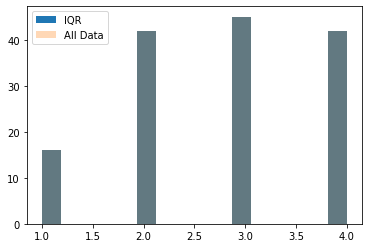

---
Outliers removed:3.0    0
2.0    0
4.0    0
1.0    0
Name: fedu, dtype: int64
None
Null values: 0
Unique values: 4
Total values in column:  145
Valid values:
3.0    45
2.0    42
4.0    42
1.0    16
Name: fedu, dtype: int64


--- mjob ( object )---


count       140
unique        5
top       other
freq         52
Name: mjob, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


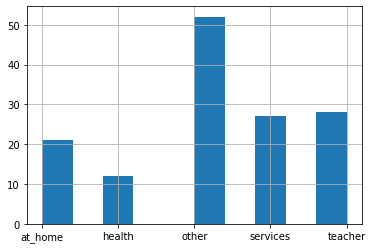

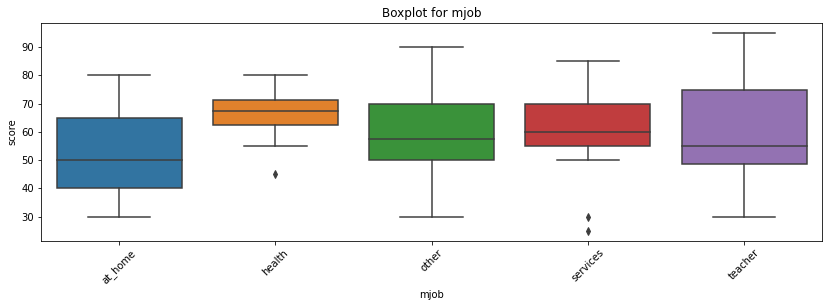

None
Null values: 5
Unique values: 5
Total values in column:  140
Valid values:
other       52
teacher     28
services    27
at_home     21
health      12
Name: mjob, dtype: int64


--- fjob ( object )---


count       138
unique        5
top       other
freq         75
Name: fjob, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


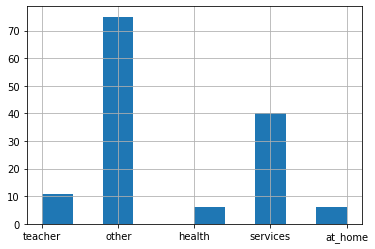

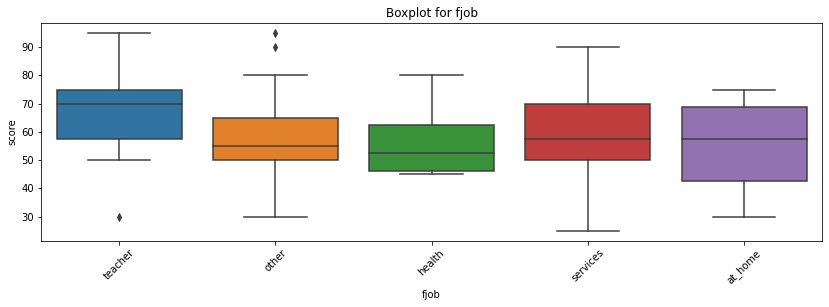

None
Null values: 7
Unique values: 5
Total values in column:  138
Valid values:
other       75
services    40
teacher     11
health       6
at_home      6
Name: fjob, dtype: int64


--- reason ( object )---


count        138
unique         4
top       course
freq          52
Name: reason, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


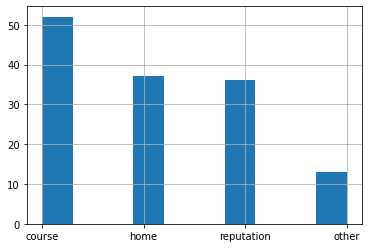

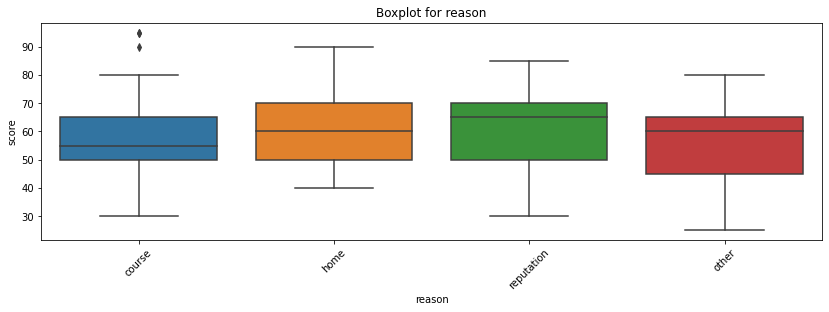

None
Null values: 7
Unique values: 4
Total values in column:  138
Valid values:
course        52
home          37
reputation    36
other         13
Name: reason, dtype: int64


--- guardian ( object )---


count        129
unique         3
top       mother
freq          94
Name: guardian, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


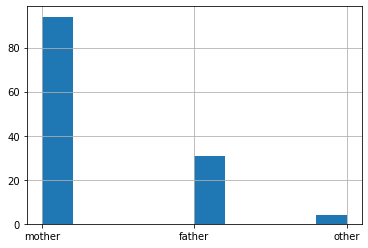

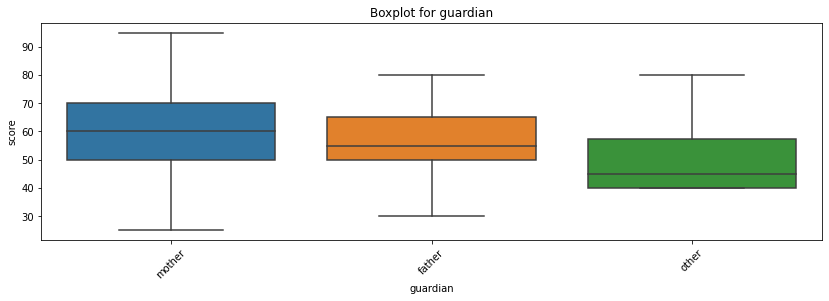

None
Null values: 16
Unique values: 3
Total values in column:  129
Valid values:
mother    94
father    31
other      4
Name: guardian, dtype: int64


--- traveltime ( float64 )---


count    145.000000
mean       1.434483
std        0.610257
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64

25th percentile:1.0, 75th pecentile:2.0 IQR:1.0 Outlier margins: [-0.5,3.5]


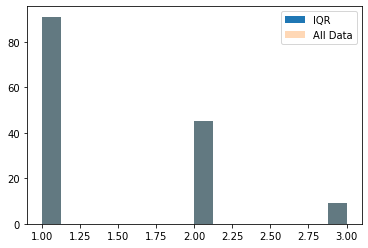

---
Outliers removed:1.0    0
2.0    0
3.0    0
Name: traveltime, dtype: int64
None
Null values: 0
Unique values: 3
Total values in column:  145
Valid values:
1.0    91
2.0    45
3.0     9
Name: traveltime, dtype: int64


--- studytime ( float64 )---


count    145.000000
mean       1.944828
std        0.674736
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64

25th percentile:1.0, 75th pecentile:2.0 IQR:1.0 Outlier margins: [-0.5,3.5]


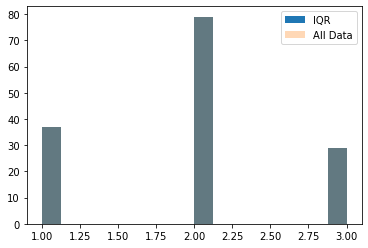

---
Outliers removed:2.0    0
1.0    0
3.0    0
Name: studytime, dtype: int64
None
Null values: 0
Unique values: 3
Total values in column:  145
Valid values:
2.0    79
1.0    37
3.0    29
Name: studytime, dtype: int64


--- failures ( float64 )---


count    145.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: failures, dtype: float64

25th percentile:0.0, 75th pecentile:0.0 IQR:0.0 Outlier margins: [0.0,0.0]


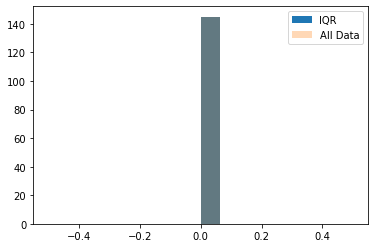

---
Outliers removed:0.0    0
Name: failures, dtype: int64
None
Null values: 0
Unique values: 1
Total values in column:  145
Valid values:
0.0    145
Name: failures, dtype: int64


--- schoolsup ( object )---


count     142
unique      2
top        no
freq      122
Name: schoolsup, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


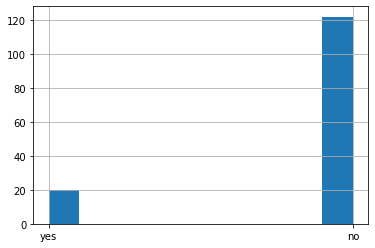

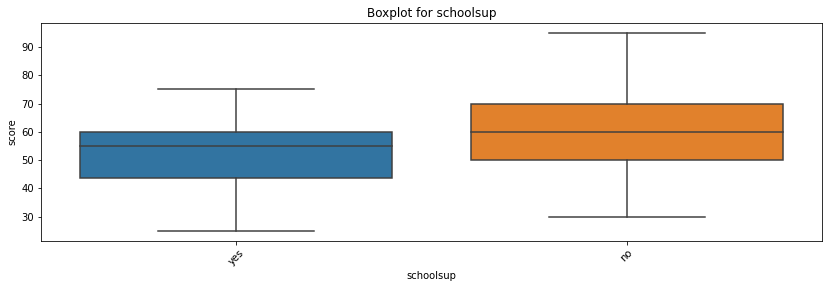

None
Null values: 3
Unique values: 2
Total values in column:  142
Valid values:
no     122
yes     20
Name: schoolsup, dtype: int64


--- famsup ( object )---


count     132
unique      2
top       yes
freq       80
Name: famsup, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


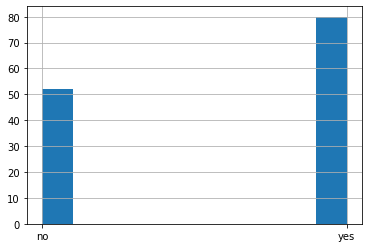

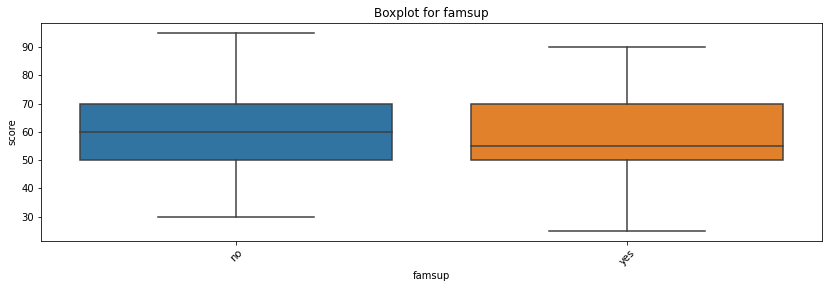

None
Null values: 13
Unique values: 2
Total values in column:  132
Valid values:
yes    80
no     52
Name: famsup, dtype: int64


--- paidlessons ( object )---


count     128
unique      2
top       yes
freq       67
Name: paidlessons, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


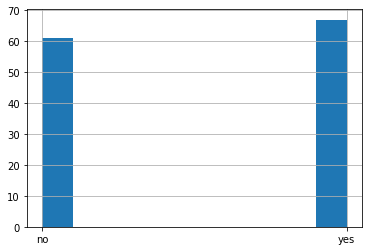

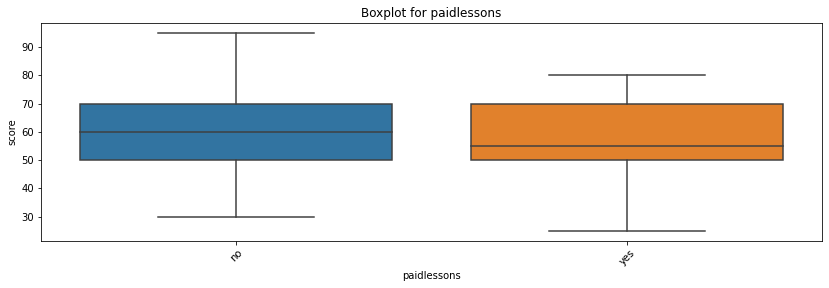

None
Null values: 17
Unique values: 2
Total values in column:  128
Valid values:
yes    67
no     61
Name: paidlessons, dtype: int64


--- activities ( object )---


count     138
unique      2
top       yes
freq       74
Name: activities, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


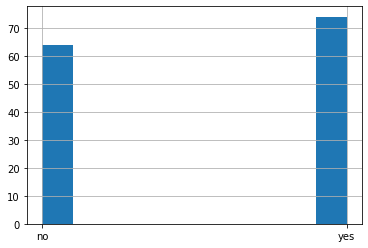

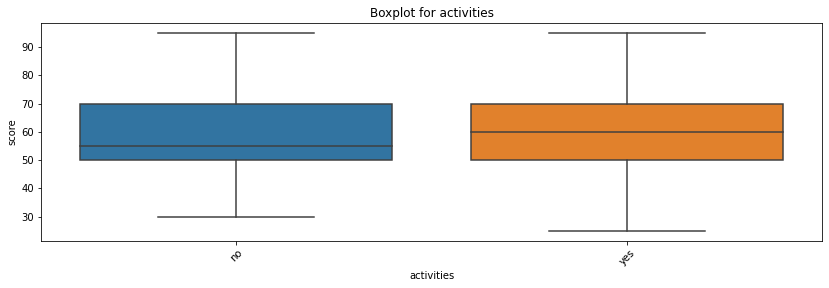

None
Null values: 7
Unique values: 2
Total values in column:  138
Valid values:
yes    74
no     64
Name: activities, dtype: int64


--- nursery ( object )---


count     139
unique      2
top       yes
freq      107
Name: nursery, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


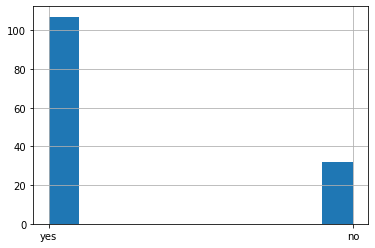

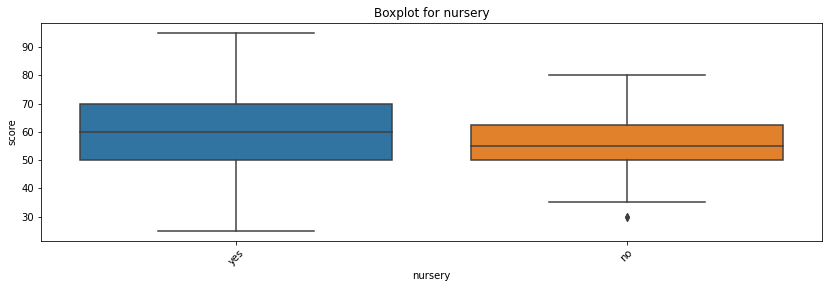

None
Null values: 6
Unique values: 2
Total values in column:  139
Valid values:
yes    107
no      32
Name: nursery, dtype: int64


--- wishhigher ( object )---


count     138
unique      2
top       yes
freq      135
Name: wishhigher, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


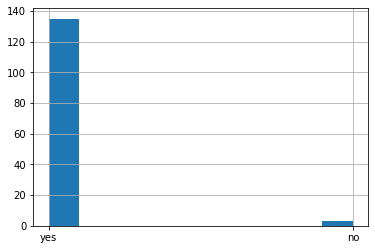

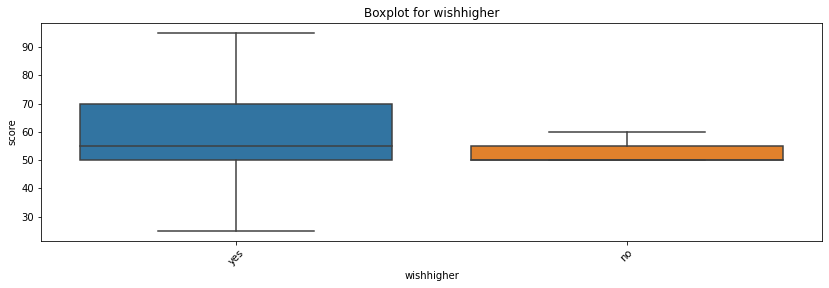

None
Null values: 7
Unique values: 2
Total values in column:  138
Valid values:
yes    135
no       3
Name: wishhigher, dtype: int64


--- internet ( object )---


count     131
unique      2
top       yes
freq      118
Name: internet, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


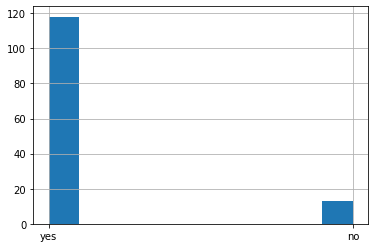

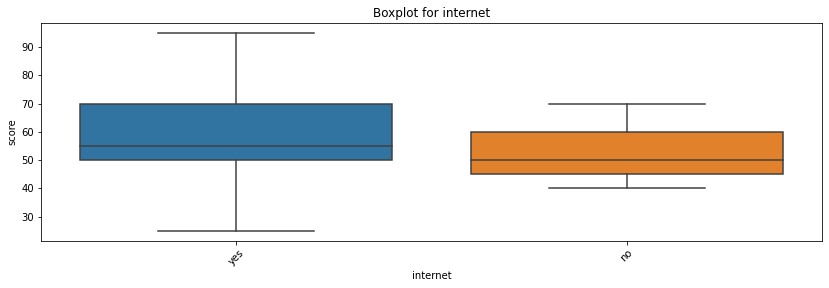

None
Null values: 14
Unique values: 2
Total values in column:  131
Valid values:
yes    118
no      13
Name: internet, dtype: int64


--- romantic ( object )---


count     135
unique      2
top        no
freq       92
Name: romantic, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


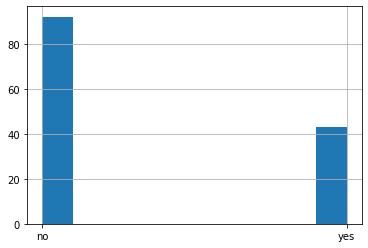

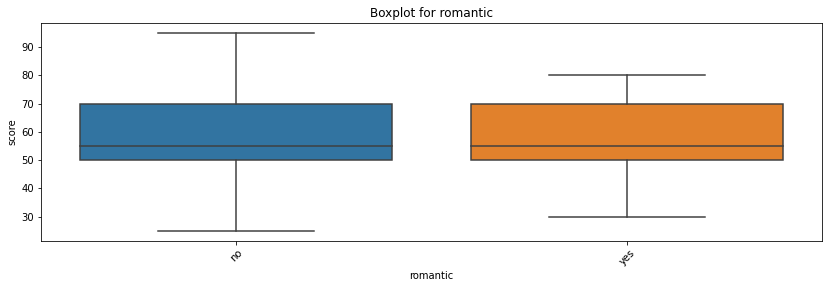

None
Null values: 10
Unique values: 2
Total values in column:  135
Valid values:
no     92
yes    43
Name: romantic, dtype: int64


--- famrel ( float64 )---


count    145.000000
mean       4.117241
std        0.692253
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25th percentile:4.0, 75th pecentile:5.0 IQR:1.0 Outlier margins: [2.5,6.5]


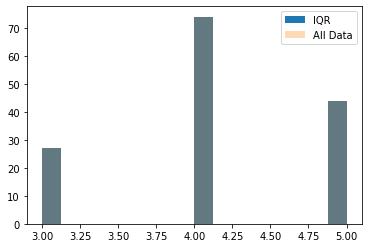

---
Outliers removed:4.0    0
5.0    0
3.0    0
Name: famrel, dtype: int64
None
Null values: 0
Unique values: 3
Total values in column:  145
Valid values:
4.0    74
5.0    44
3.0    27
Name: famrel, dtype: int64


--- freetime ( float64 )---


count    145.000000
mean       3.262069
std        0.833506
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25th percentile:3.0, 75th pecentile:4.0 IQR:1.0 Outlier margins: [1.5,5.5]


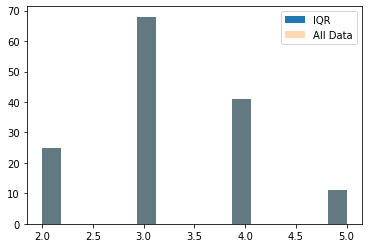

---
Outliers removed:3.0    0
4.0    0
2.0    0
5.0    0
Name: freetime, dtype: int64
None
Null values: 0
Unique values: 4
Total values in column:  145
Valid values:
3.0    68
4.0    41
2.0    25
5.0    11
Name: freetime, dtype: int64


--- goout ( float64 )---


count    145.000000
mean       3.041379
std        0.970938
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25th percentile:2.0, 75th pecentile:4.0 IQR:2.0 Outlier margins: [-1.0,7.0]


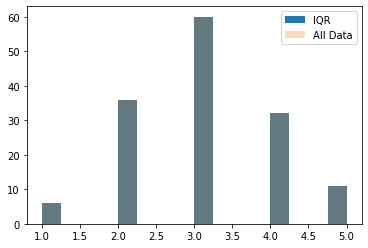

---
Outliers removed:3.0    0
2.0    0
4.0    0
5.0    0
1.0    0
Name: goout, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  145
Valid values:
3.0    60
2.0    36
4.0    32
5.0    11
1.0     6
Name: goout, dtype: int64


--- health ( float64 )---


count    145.000000
mean       3.413793
std        1.336383
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25th percentile:2.0, 75th pecentile:5.0 IQR:3.0 Outlier margins: [-2.5,9.5]


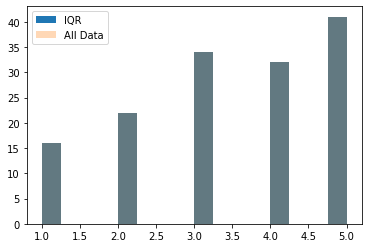

---
Outliers removed:5.0    0
3.0    0
4.0    0
2.0    0
1.0    0
Name: health, dtype: int64
None
Null values: 0
Unique values: 5
Total values in column:  145
Valid values:
5.0    41
3.0    34
4.0    32
2.0    22
1.0    16
Name: health, dtype: int64


--- absences ( float64 )---


count    145.000000
mean       3.696552
std        3.615791
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       14.000000
Name: absences, dtype: float64

25th percentile:0.0, 75th pecentile:6.0 IQR:6.0 Outlier margins: [-9.0,15.0]


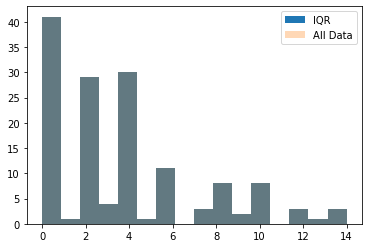

---
Outliers removed:0.0     0
4.0     0
2.0     0
6.0     0
8.0     0
10.0    0
3.0     0
7.0     0
14.0    0
12.0    0
9.0     0
1.0     0
13.0    0
5.0     0
Name: absences, dtype: int64
None
Null values: 0
Unique values: 14
Total values in column:  145
Valid values:
0.0     41
4.0     30
2.0     29
6.0     11
8.0      8
10.0     8
3.0      4
7.0      3
14.0     3
12.0     3
9.0      2
1.0      1
13.0     1
5.0      1
Name: absences, dtype: int64


--- score ( float64 )---


count    145.000000
mean      58.689655
std       14.553788
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

25th percentile:50.0, 75th pecentile:70.0 IQR:20.0 Outlier margins: [20.0,100.0]


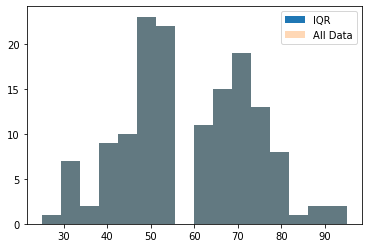

---
Outliers removed:50.0    0
55.0    0
70.0    0
65.0    0
75.0    0
60.0    0
45.0    0
40.0    0
80.0    0
30.0    0
95.0    0
90.0    0
35.0    0
85.0    0
25.0    0
Name: score, dtype: int64
None
Null values: 0
Unique values: 15
Total values in column:  145
Valid values:
50.0    23
55.0    22
70.0    19
65.0    15
75.0    13
60.0    11
45.0    10
40.0     9
80.0     8
30.0     7
95.0     2
90.0     2
35.0     2
85.0     1
25.0     1
Name: score, dtype: int64


KeyError: 'col'

In [430]:
for col in data.columns:
    check_column(col)

In [412]:
# OK: school, sex
# 

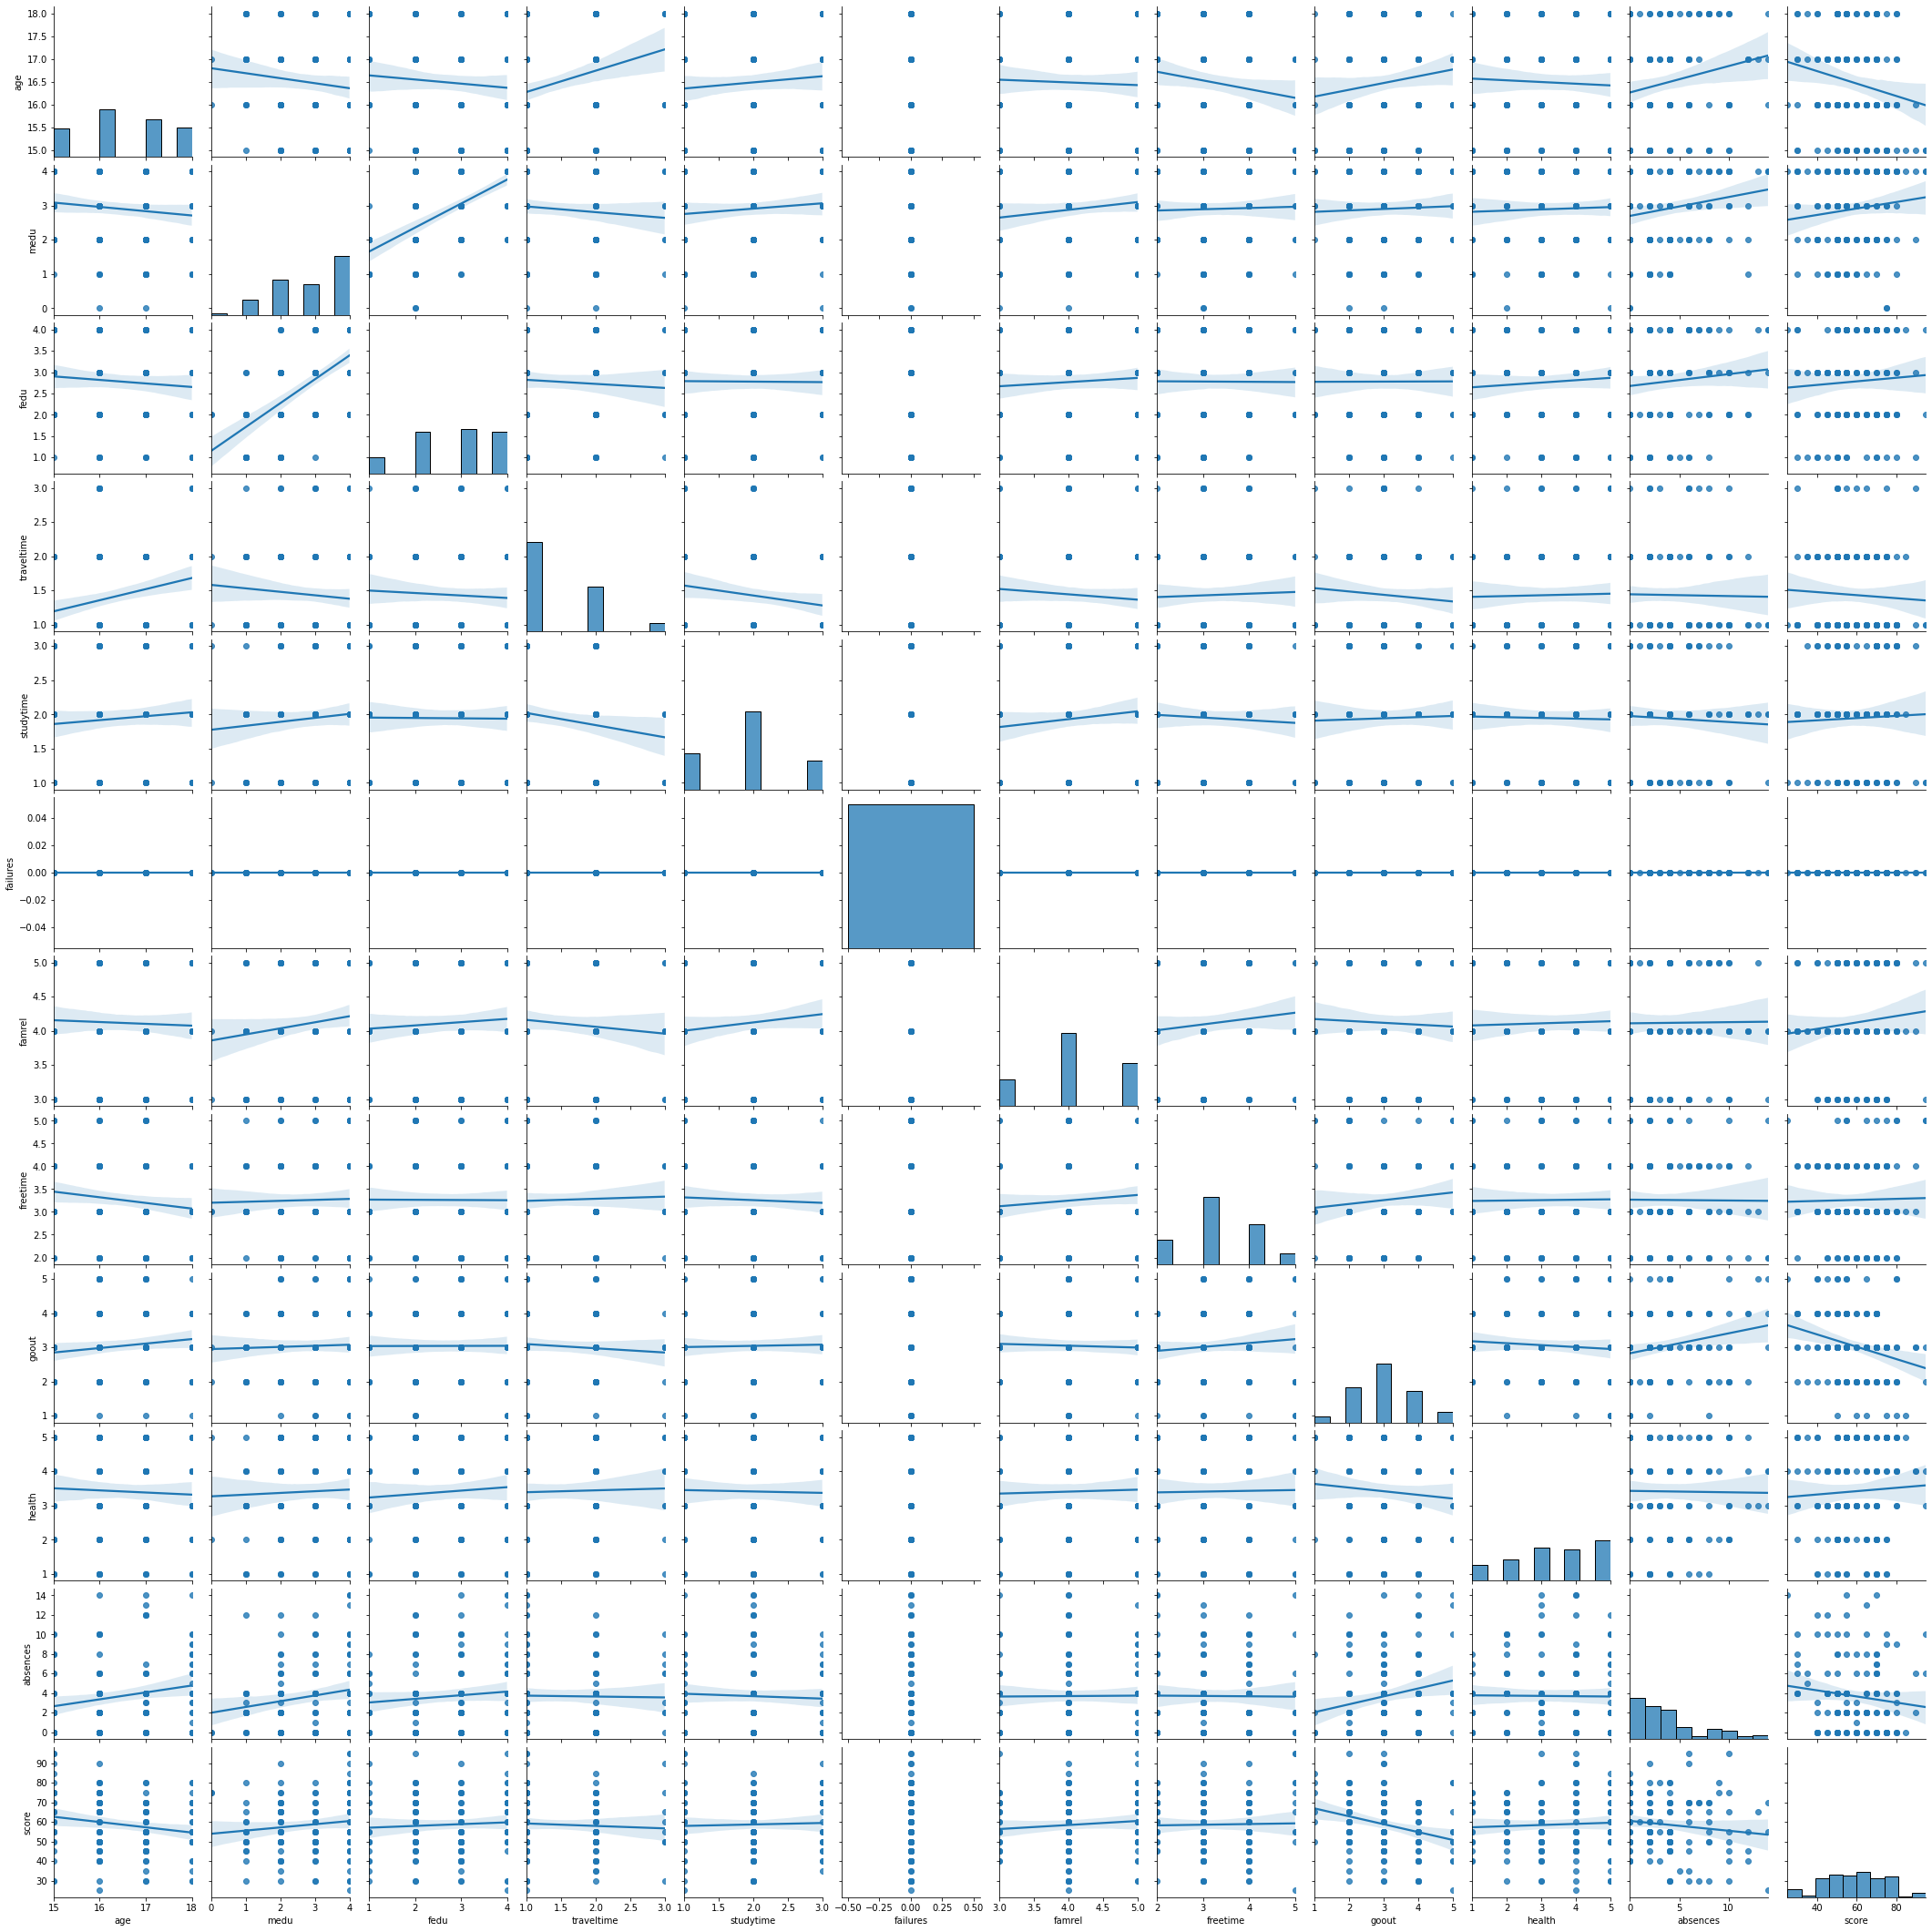

In [431]:
sns.pairplot(df, kind='reg')
